# Emotional and Linguistic Framing of Digital Detox

### Notebook 7: Visualisation

Purpose: - Visualise trends, topic heatmaps, PCA, sentiment over time

In [1]:
# required packages
!pip install pandas matplotlib seaborn plotly

# imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
!pip install textblob
from textblob import TextBlob
from sklearn.decomposition import PCA


[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip
  Using cached textblob-0.19.0-py3-none-any.whl.metadata (4.4 kB)
Using cached textblob-0.19.0-py3-none-any.whl (624 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.1.1
[notice] To update, run: pip install --upgrade pip


In [2]:
# load dfs
df_final_with_sentiment = pd.read_csv('df_vad_weighted_with_sentiment.csv')
df_vad_pca = pd.read_csv('df_vad_pca.csv')

In [3]:
detox_df = pd.read_csv('/home/jovyan/XXX/Back up/XXX/detox_with_topics.csv')
control_df = pd.read_csv('/home/jovyan/XXX/Back up/XXX/control_with_topics.csv')
combined_df = pd.concat([detox_df, control_df], ignore_index=True)

#### PCA of Weighted VAD Scores

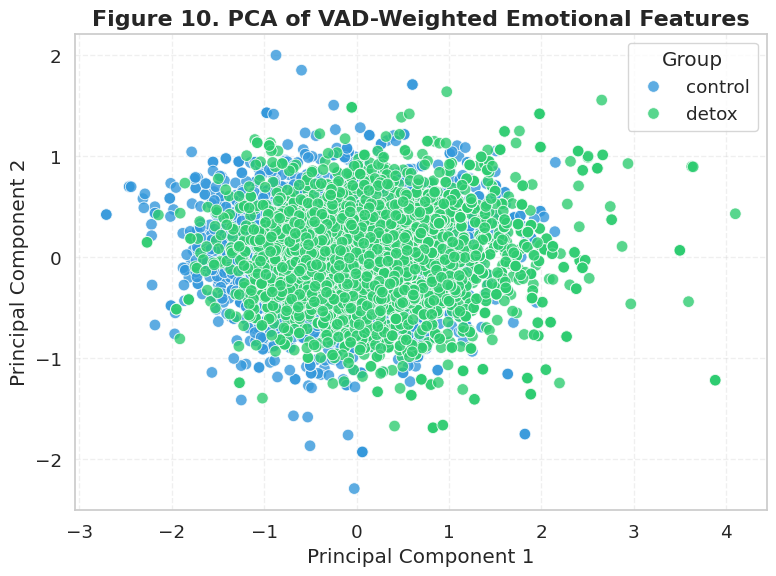

In [5]:
# Load data
df = pd.read_csv('df_vad_pca.csv')

# colour customisation 
sns.set(style='whitegrid', context='notebook', font_scale=1.2)
custom_palette = ['#3498db', '#2ecc71'] 

# plot
plt.figure(figsize=(8, 6))
sns.scatterplot(
    data=df, x='PC1', y='PC2', hue='label',
    palette=custom_palette, s=70, alpha=0.8
)

# labels and formatting
plt.title("Figure 10. PCA of VAD-Weighted Emotional Features", fontsize=16, fontweight='bold')
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title='Group')
plt.grid(True, linestyle='--', alpha=0.3)
plt.tight_layout()

plt.show()

#### Heatmap: VAD by Topic & Group

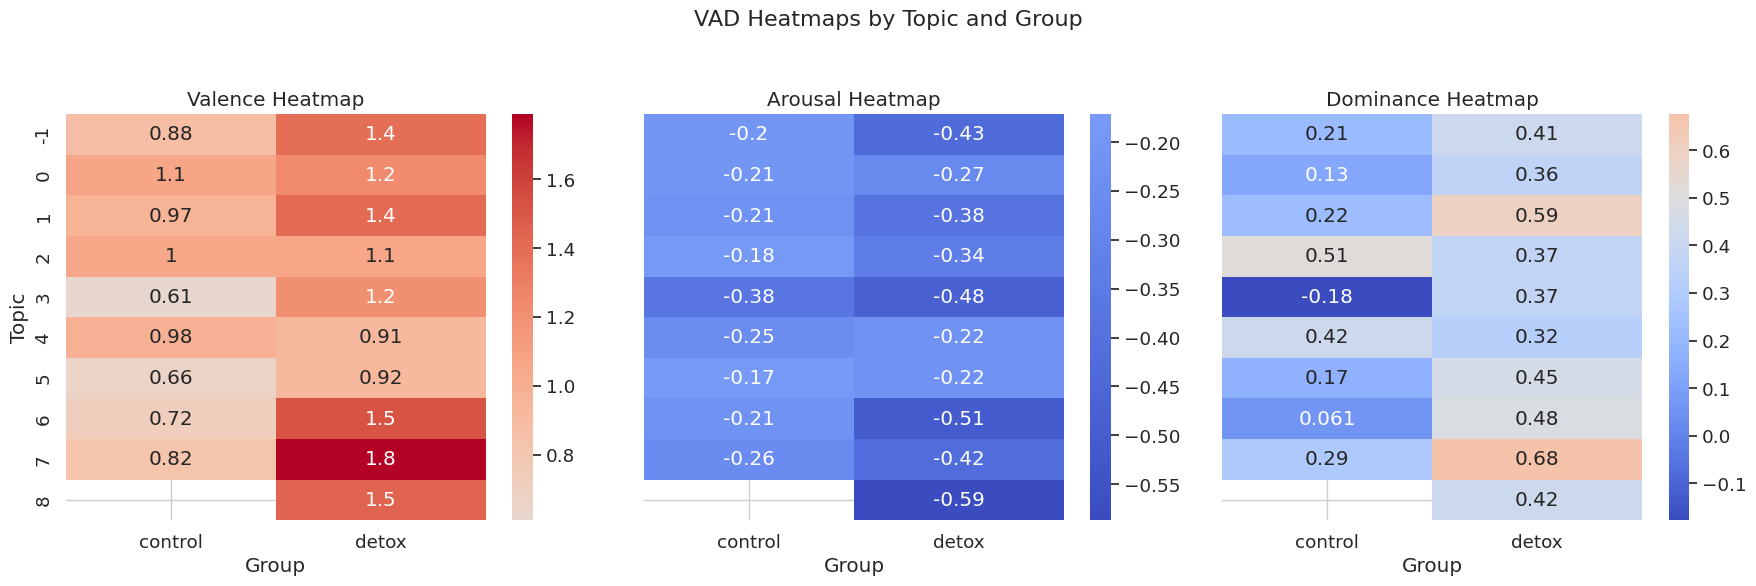

In [6]:
# group the data to get mean VAD scores by topic and group
topic_vad = df_final_with_sentiment.groupby(['topic', 'label'])[['valence', 'arousal', 'dominance']].mean().reset_index()

# create subplots for valence, arousal, and dominance heatmaps
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# heatmap for calence
valence_data = topic_vad.pivot(index='topic', columns='label', values='valence')
sns.heatmap(valence_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[0])
axes[0].set_title('Valence Heatmap')
axes[0].set_xlabel('Group')
axes[0].set_ylabel('Topic')

# heatmap for arousal
arousal_data = topic_vad.pivot(index='topic', columns='label', values='arousal')
sns.heatmap(arousal_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[1])
axes[1].set_title('Arousal Heatmap')
axes[1].set_xlabel('Group')
axes[1].set_ylabel('')

# heatmap for dominance
dominance_data = topic_vad.pivot(index='topic', columns='label', values='dominance')
sns.heatmap(dominance_data, annot=True, cmap='coolwarm', center=0.5, ax=axes[2])
axes[2].set_title('Dominance Heatmap')
axes[2].set_xlabel('Group')
axes[2].set_ylabel('')

# final layout and title
plt.suptitle('VAD Heatmaps by Topic and Group', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### Keyword Frequencies 

This supports Hypothesis 2: wellness/self-reflective language is unique to digital detox discourse.

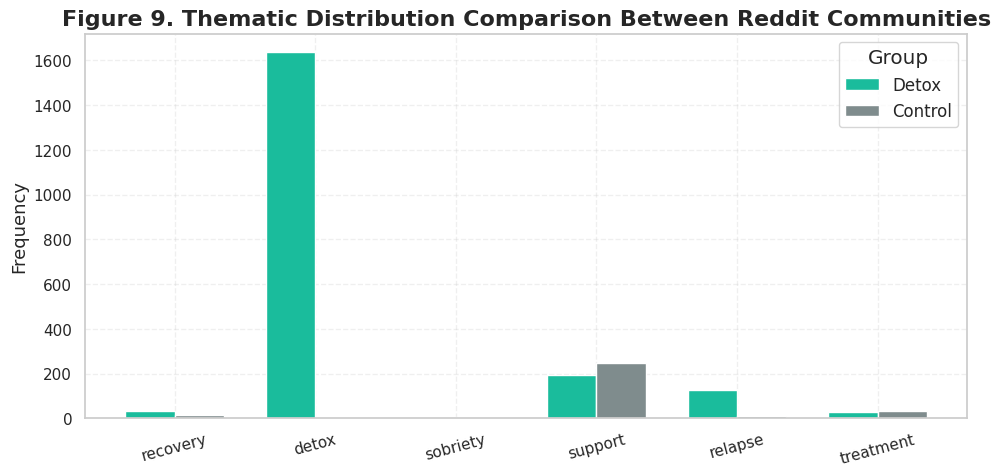

In [13]:
#Chia, A. (2024, July 17). Python Boxplots: A comprehensive guide for beginners. https://www.datacamp.com/tutorial/python-boxplots

# keywords list
keywords = ["recovery", "detox", "sobriety", "support", "relapse", "treatment"]

# count keyword occurrences
detox_counts = [detox_df['body'].str.contains(k, case=False, na=False).sum() for k in keywords]
control_counts = [control_df['body'].str.contains(k, case=False, na=False).sum() for k in keywords]

# plot setup
x = np.arange(len(keywords))
width = 0.35

sns.set(style='whitegrid', context='notebook', font_scale=1.2)
plt.rcParams.update({
    'axes.titlesize': 16,
    'axes.labelsize': 13,
    'xtick.labelsize': 11,
    'ytick.labelsize': 11,
    'legend.fontsize': 12,
    'grid.alpha': 0.3,
    'grid.linestyle': '--'
})

fig, ax = plt.subplots(figsize=(10, 5))

# colour palette
bars1 = ax.bar(x - width/2, detox_counts, width, label='Detox', color='#1abc9c')  # teal
bars2 = ax.bar(x + width/2, control_counts, width, label='Control', color='#7f8c8d')  # gray

# labels and title
ax.set_ylabel('Frequency')
ax.set_title('Figure 9. Thematic Distribution Comparison Between Reddit Communities', fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(keywords, rotation=15)
ax.legend(title="Group")
ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()

plt.show()

### Violin Plots

/tmp/ipykernel_858/1444841105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette=custom_palette,
/tmp/ipykernel_858/1444841105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette=custom_palette,
/tmp/ipykernel_858/1444841105.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette=custom_palette,


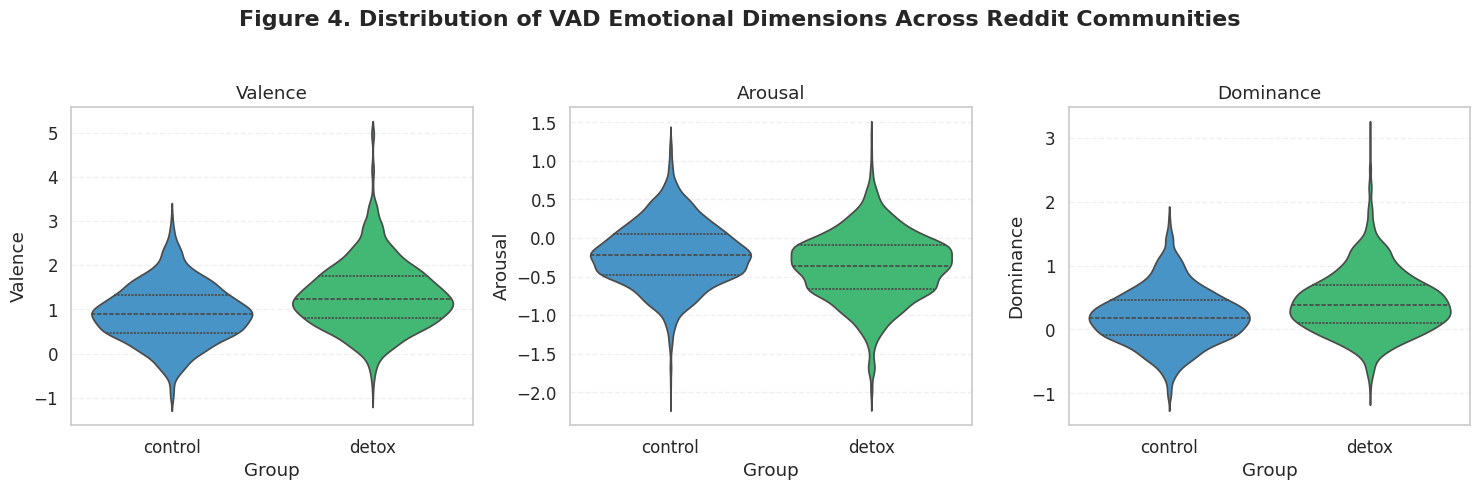

In [11]:
variables = ['valence', 'arousal', 'dominance']
custom_palette = ['#3498db', '#2ecc71']

sns.set(style='whitegrid', context='notebook', font_scale=1.1)

fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=False)

for ax, var in zip(axes, variables):
    sns.violinplot(data=df_final_with_sentiment, x='label', y=var, palette=custom_palette,
                   inner='quartile', ax=ax)
    ax.set_title(f"{var.capitalize()}")
    ax.set_xlabel("Group")
    ax.set_ylabel(var.capitalize())
    ax.grid(axis='y', linestyle='--', alpha=0.3)

plt.suptitle("Figure 4. Distribution of VAD Emotional Dimensions Across Reddit Communities", fontsize=16, fontweight='bold')
plt.tight_layout(rect=[0, 0, 1, 0.95])

plt.show()

/tmp/ipykernel_858/3312867799.py:19: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.barplot(data=df_long, x='VAD', y='Score', hue='label', ci=95, palette=colors)


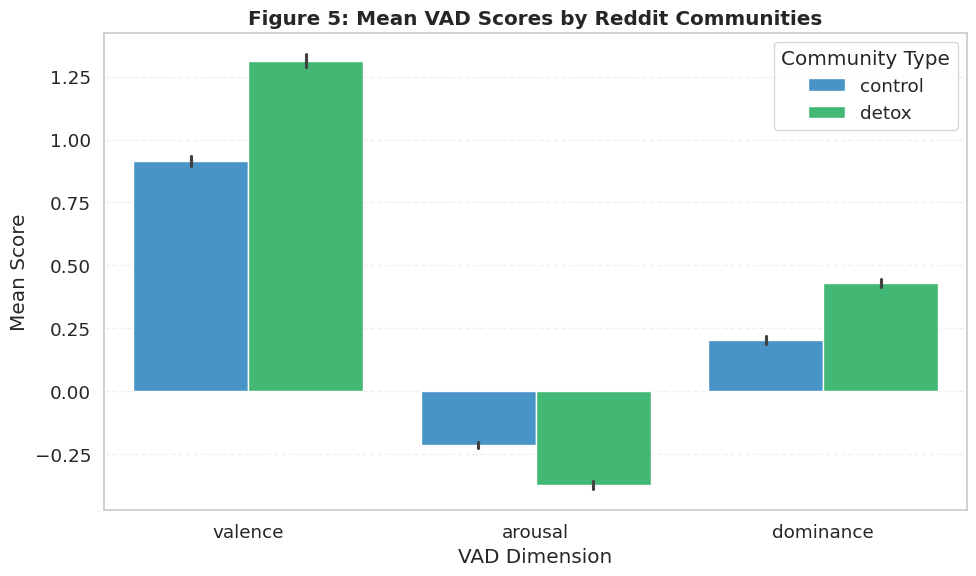

In [15]:
# define VAD variables and reshape the DataFrame to long format
vad_vars = ['valence', 'arousal', 'dominance']
df_long = df_final_with_sentiment.melt(id_vars='label', 
                                       value_vars=vad_vars,
                                       var_name='VAD', 
                                       value_name='Score')

# set plot style and size
sns.set(style='whitegrid', context='notebook', font_scale=1.2)
plt.figure(figsize=(10, 6))

# colour
colors = ['#3498db', '#2ecc71']  # blue and green

# create barplot with confidence intervals
sns.barplot(data=df_long, x='VAD', y='Score', hue='label', ci=95, palette=colors)

# add labels and title
plt.title("Figure 5: Mean VAD Scores by Reddit Communities", fontweight='bold')
plt.xlabel("VAD Dimension")
plt.ylabel("Mean Score")
plt.legend(title="Community Type")
plt.grid(axis='y', linestyle='--', alpha=0.3)

plt.tight_layout()
plt.show()

### Findings 

**Figure 10 Interpretation:** PCA visualisation reveals distinct emotional signatures. Control posts cluster tightly around the centre (uniform emotional tone), while detox posts show broader dispersion with emotionally intense outliers representing personal transformation narratives. This pattern supports H1's prediction of different VAD profiles.

**VAD Heatmap Interpretation:** Topic 2 (detox) exhibits the strongest positivity and dominance scores, indicating narratives of empowered and successful detoxification. The systematic progression from struggle to empowerment across detox topics contrasts sharply with the consistent patterns of the control topics.

**Keyword Frequency Analysis:** The dramatic frequency difference for "detox" (1600+ vs 0) confirms successful group separation. "Support" appears equally in both groups, suggesting shared community-building but around different focal topics.

**Violin Plot Analysis:** Detox posts show higher valence (more positive), slightly lower arousal (calmer), and higher dominance (more controlled) compared to control posts. These patterns directly confirm H1's predictions about VAD differences.